# FIN654 Project 1 – HO2 Analysis

## Team Members
## _Adil Gokturk, Mary Russell, Timothy Konze, Lucaz Spinazzola,Teresa Cameron, Jack O'Connor_

## Assignment 
Submit into Coursework > Assignments and Grading > Project 1 > Submission an RMD file with filename lastname-firstname_Project1.Rmd. If you have difficulties submitting a .Rmd file, then submit a .txt file.

Use headers (##), r-chunks for code, and text to build a report that addresses the two parts of this project.

List in the text the ‘R’ skills needed to complete this project.

Explain each of the functions (e.g., ggplot()) used to compute and visualize results.

Discuss how well did the results begin to answer the business questions posed at the beginning of each part of the project.

## Part 1 - HO2 data preparation and exploration

In this set we will build **a data set using filters and if and diff statements.**
We will then answer some questions using **plots and a pivot table report.**

We will then **write a function to house our approach in case we would like to run the same analysis on other data sets.**

## Problem

Supply chain managers at our company continue to note we have a significant exposure to heating oil prices (Heating Oil No. 2, or HO2), specifically New York Harbor. 

The exposure hits the variable cost of producing several products. 

When HO2 is volatile, so is earnings. 

Our company has missed earnings forecasts for five straight quarters. 

To get a handle on HO2 we download this data set and review some basic aspects of the prices.

(INSERT explanatory text here)

In [1]:
# Read in data
# package EIAdata
#install.packages("EIAdata")
library(ggplot2)
library(IRdisplay)
library(psych)
library(GGally)
library(dplyr)
library(xtable)

ERROR: Error in library(ggplot2): there is no package called ‘ggplot2’


In [36]:
getwd()

[1] "/Users/HAG/Desktop/Spring2020/FIN654/Assignments_FIN654/Project1"

In [38]:
HO2 <- read.csv("nyhh02.csv", header = T, stringsAsFactors = F)
# stringsAsFactors sets dates as character type

head(HO2)

DATE,DHOILNYH
6/2/1986,0.402
6/3/1986,0.393
6/4/1986,0.378
6/5/1986,0.390
6/6/1986,0.385
6/9/1986,0.373


In [39]:
HO2 <- na.omit(HO2) ## to clean up any missing data

# use na.approx() as well
str(HO2) # review the structure of the data so far

'data.frame':	7697 obs. of  2 variables:
 $ DATE    : chr  "6/2/1986" "6/3/1986" "6/4/1986" "6/5/1986" ...
 $ DHOILNYH: num  0.402 0.393 0.378 0.39 0.385 0.373 0.365 0.389 0.394 0.398 ...


## Question 1

## What is the nature of HEATING OIL 2--HO2 returns? 

## We want to reflect the ups and downs of price movements, something of prime interest to management. 

## First, we calculate percentage changes as log returns. 

## Our interest is in the ups and downs. 

## To look at that we use if and else statements to define a new column called direction. We will build a data frame to house this analysis.

In [42]:
# Construct expanded data frame
return <- as.numeric(diff(log(HO2$DHOILNYH))) * 100 # Euler 
size <- as.numeric(abs(return)) # size is indicator of volatility
direction <- ifelse(return > 0, "up", ifelse(return < 0, "down", "same")) # another indicator of volatility
# =if(return > 0, "up", if(return < 0, "down", "same"))
date <- as.Date(HO2$DATE[-1], "%m/%d/%Y") # length of DATE is length of return +1: omit 1st observation
price <- as.numeric(HO2$DHOILNYH[-1]) # length of DHOILNYH is length of return +1: omit first observation
HO2.df <- na.omit(data.frame(date = date, price = price, return = return, size = size, direction = direction)) # clean up data frame by omitting NAs
str(HO2.df)

'data.frame':	7696 obs. of  5 variables:
 $ date     : Date, format: "1986-06-03" "1986-06-04" ...
 $ price    : num  0.393 0.378 0.39 0.385 0.373 0.365 0.389 0.394 0.398 0.379 ...
 $ return   : num  -2.26 -3.89 3.13 -1.29 -3.17 ...
 $ size     : num  2.26 3.89 3.13 1.29 3.17 ...
 $ direction: Factor w/ 3 levels "down","same",..: 1 1 3 1 1 1 3 3 3 1 ...


We can plot with the ggplot2 package. 

In the ggplot statements we use aes, “aesthetics”, to pick x (horizontal) and y (vertical) axes. 

Use group =1 to ensure that all data is plotted. The added (+) geom_line is the geometrical method that builds the line plot.

_I used the plot by using option function_

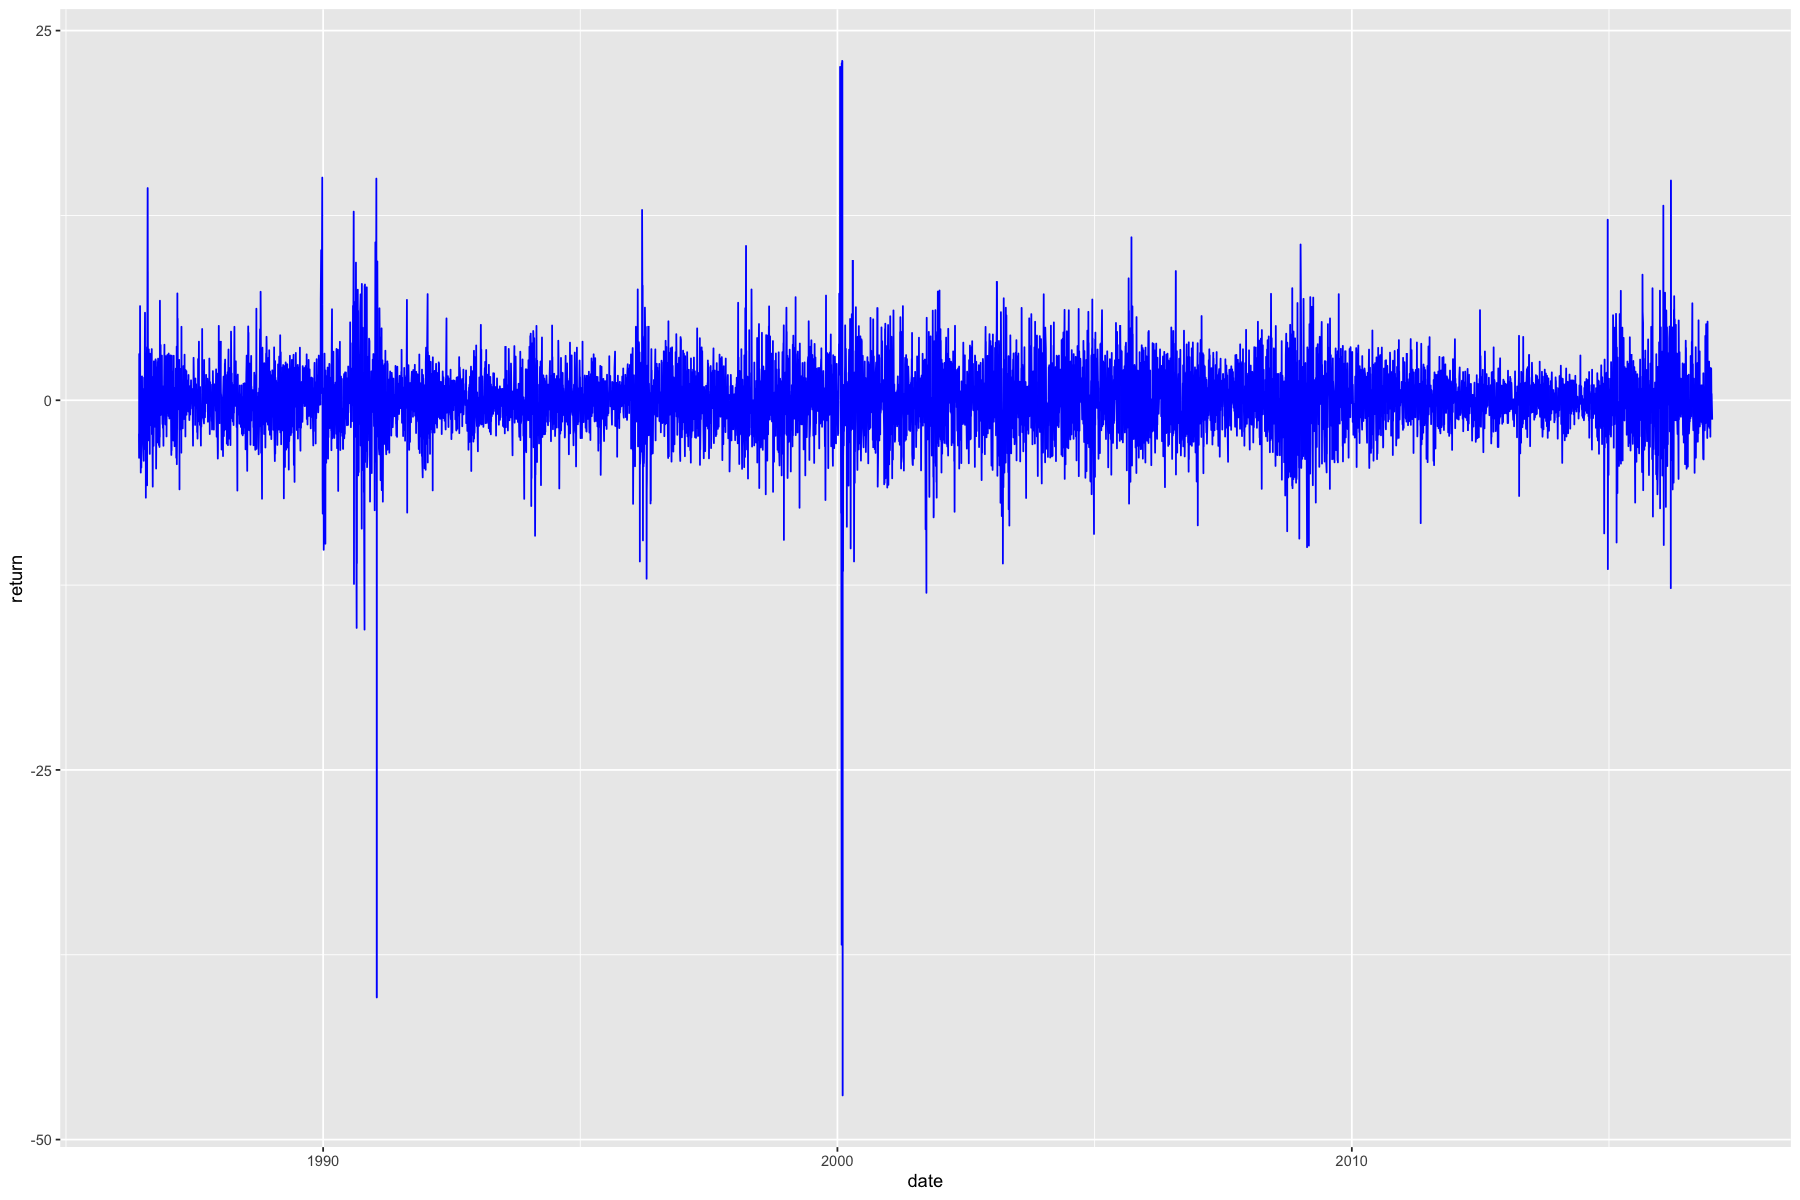

In [47]:
options(repr.plot.width=15, repr.plot.height=10) 
p <- ggplot(HO2.df, aes(x = date, y = return, group = 1)) + geom_line(colour = "blue")
p

# _Comments: Apparently, the HO2 price has a Highly volatile nature. Lots of negative and positive spikes, lots of clustering. Clustering of volatility is likely triggered by world events: Persian Golf War and 9/11._

Let’s try a bar graph of the absolute value of price rates. We use geom_bar to build this picture.

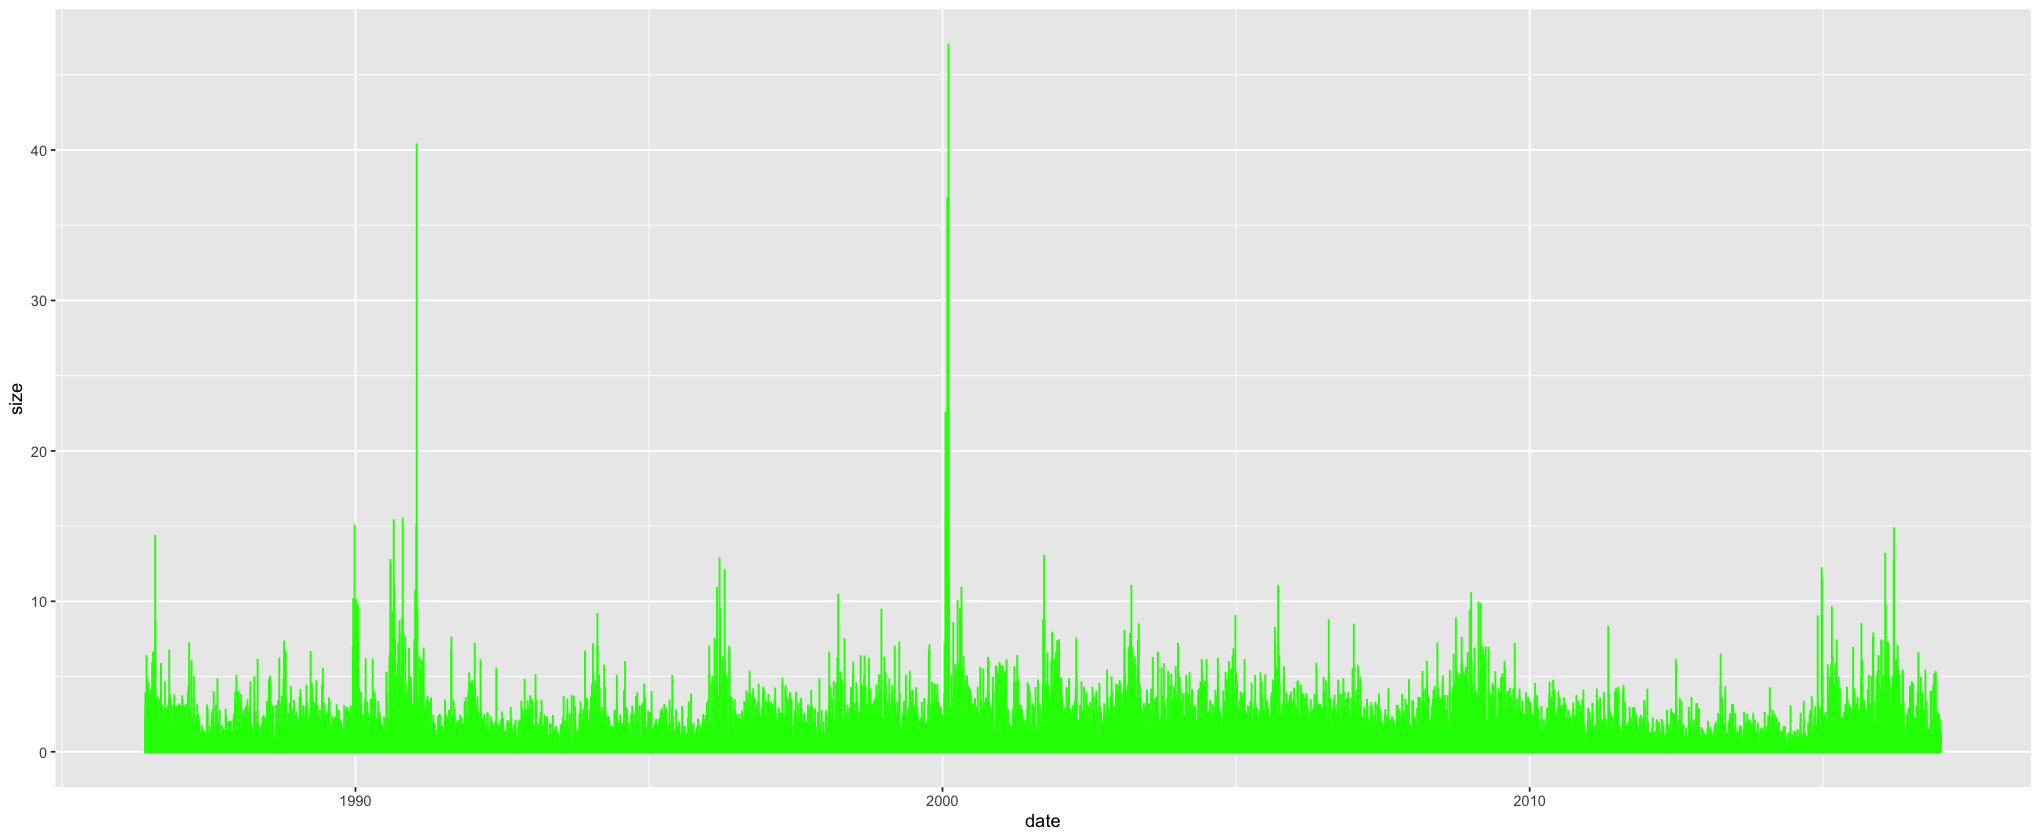

In [52]:
options(repr.plot.width=17, repr.plot.height=7) 
p <- ggplot(HO2.df, aes(x = date, y = size, group = 1)) + geom_bar(stat = "identity", colour = "green")
p

# _Comments: The absolute values also highlights the magnitude of the  HO2 price volatility.It also helps us identify the cyclical nature of price volitility_

## Now let’s build an overlay of return on size.

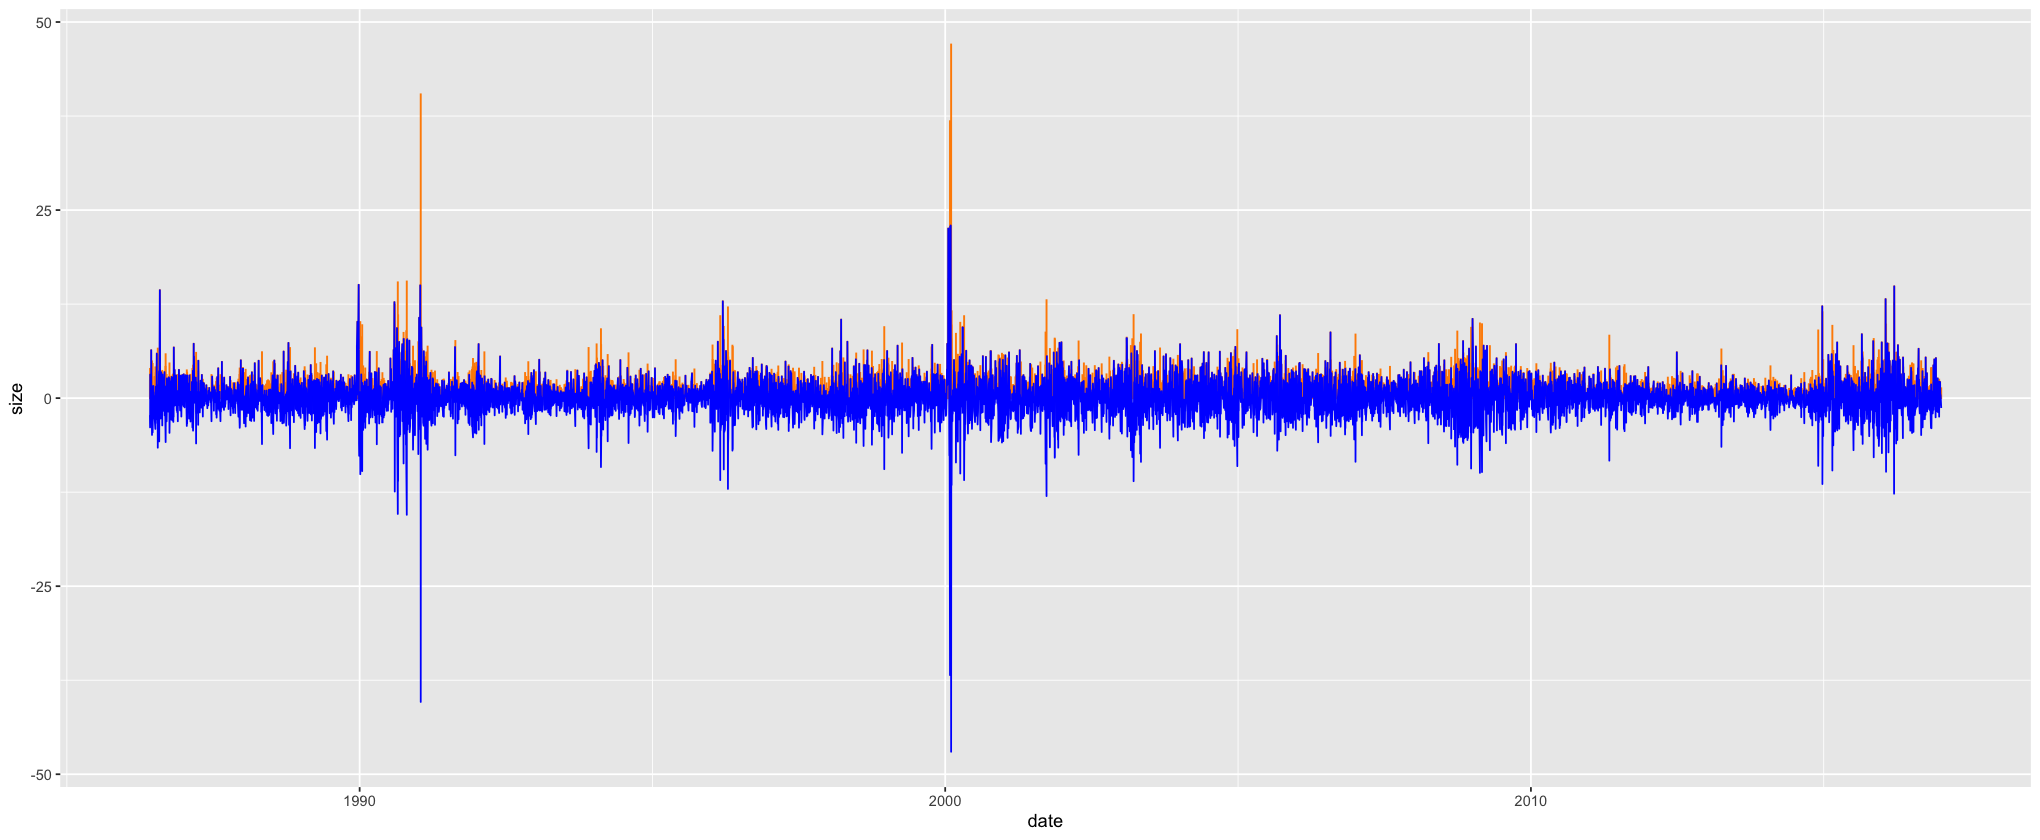

In [53]:
options(repr.plot.width=17, repr.plot.height=7) 
p <- ggplot(HO2.df, aes(date, size)) + geom_bar(stat = "identity", colour = "darkorange") + geom_line(data = HO2.df, aes(date, return), colour = "blue")
p

# _Comments: Largest peaks in daily changes are decreases in price_ 

### 2. Let’s dig deeper and compute mean, standard deviation, etc. 

Load the data_moments() function. Run the function using the HO2.df$return subset of the data and write a knitr::kable() report.

In [60]:
# Load the data_moments() function
## data_moments function
## INPUTS: vector
## OUTPUTS: list of scalars (mean, sd, median, skewness, kurtosis)
data_moments <- function(data){
  library(moments)
  mean.r <- mean(data)
  sd.r <- sd(data)
  median.r <- median(data)
  skewness.r <- skewness(data)
  kurtosis.r <- kurtosis(data)
  result <- data.frame(mean = mean.r, std_dev = sd.r, median = median.r, skewness = skewness.r, kurtosis = kurtosis.r)
  return(result)
}

In [61]:
# Run data_moments()
answer <- data_moments(HO2.df$return)
# Build pretty table
answer <- round(answer, 4)
knitr::kable(answer)



|   mean| std_dev| median| skewness| kurtosis|
|------:|-------:|------:|--------:|--------:|
| 0.0179|  2.5236|      0|  -1.4353|  38.2595|

# _Comments: The negative skewness provides evidence for more negative observations than positive. In other words, this data suggests that there are more positive observations; however, the negative observations are greater in magnitude. HO2 has a high kurtosis  of 38.2595 means a pretty heavy tail. That means they have happened more often than positive returns, which is a serious issue._


### 3. Let’s pivot size and return on direction. 
What is the average and range of returns by direction? How often might we view positive or negative movements in HO2?

In [62]:
# Counting
table(HO2.df$return < 0) # one way
table(HO2.df$return > 0)
table(HO2.df$direction) # this counts 0 returns as negative
table(HO2.df$return == 0)


FALSE  TRUE 
 4039  3657 


FALSE  TRUE 
 3936  3760 


down same   up 
3657  279 3760 


FALSE  TRUE 
 7417   279 

# _Comments: Evidently the overall return trend is negative._

In [68]:
# Pivoting
## 1: filter to those houses with fairly high prices
# pivot.table <-  filter(HO2.df, size > 0.5*max(size))
## 2: set up data frame for by-group processing
pivot.table <-  group_by(HO2.df, direction)
## 3: calculate the summary metrics
options(dplyr.width = Inf) ## to display all columns
HO2.count <- length(HO2.df$return)
pivot.table <-  summarise(pivot.table, return.avg = round(mean(return), 4),
                          return.sd = round(sd(return), 4),
                          quantile.5 = round(quantile(return, 0.05), 4),
                          quantile.95 = round(quantile(return, 0.95), 4),
                          percent = round((length(return)/HO2.count)*100, 2))

In [69]:
# Build visual
knitr::kable(pivot.table, digits = 2)
# Here is how we can produce a LaTeX formatted and rendered table

HO2.caption <- "Heating Oil No. 2: 1986-2016"
print(xtable(t(pivot.table), digits = 2, caption = HO2.caption, align=rep("r", 4), table.placement="V"))
print(xtable(answer), digits = 2)



|direction | return.avg| return.sd| quantile.5| quantile.95| percent|
|:---------|----------:|---------:|----------:|-----------:|-------:|
|down      |      -1.77|      1.99|      -4.78|       -0.19|   47.52|
|same      |       0.00|      0.00|       0.00|        0.00|    3.63|
|up        |       1.76|      1.75|       0.18|        4.82|   48.86|

% latex table generated in R 3.6.0 by xtable 1.8-4 package
% Tue Jan 28 19:13:45 2020
\begin{table}[ht]
\centering
\begin{tabular}{rrrr}
  \hline
 & 1 & 2 & 3 \\ 
  \hline
direction & down & same & up \\ 
  return.avg & -1.7718 &  0.0000 &  1.7598 \\ 
  return.sd & 1.9862 & 0.0000 & 1.7460 \\ 
  quantile.5 & -4.7761 &  0.0000 &  0.1817 \\ 
  quantile.95 & -0.1894 &  0.0000 &  4.8203 \\ 
  percent & 47.52 &  3.63 & 48.86 \\ 
   \hline
\end{tabular}
\caption{Heating Oil No. 2: 1986-2016} 
\end{table}
% latex table generated in R 3.6.0 by xtable 1.8-4 package
% Tue Jan 28 19:13:45 2020
\begin{table}[ht]
\centering
\begin{tabular}{rrrrrr}
  \hline
 & mean & std\_dev & median & skewness & kurtosis \\ 
  \hline
1 & 0.02 & 2.52 & 0.00 & -1.44 & 38.26 \\ 
   \hline
\end{tabular}
\end{table}


# _Comments: Similar results on negative direction of return_

## Part 2 - HO2 analysis
We will use the data from Part 1 to investigate the distribution of returns we generated. This will entail fitting the data to some parametric distributions as well as

## Problem
We want to further characterize the distribution of up and down movements visually. Also we would like to repeat the analysis periodically for inclusion in management reports.

### Question1 
How can we **show the differences in the shape of ups and downs in HO2, especially given our tolerance for risk**

We can use the HO2.df data frame with ggplot2 and the cumulative relative frequency function stat_ecdf to begin to understand this data.

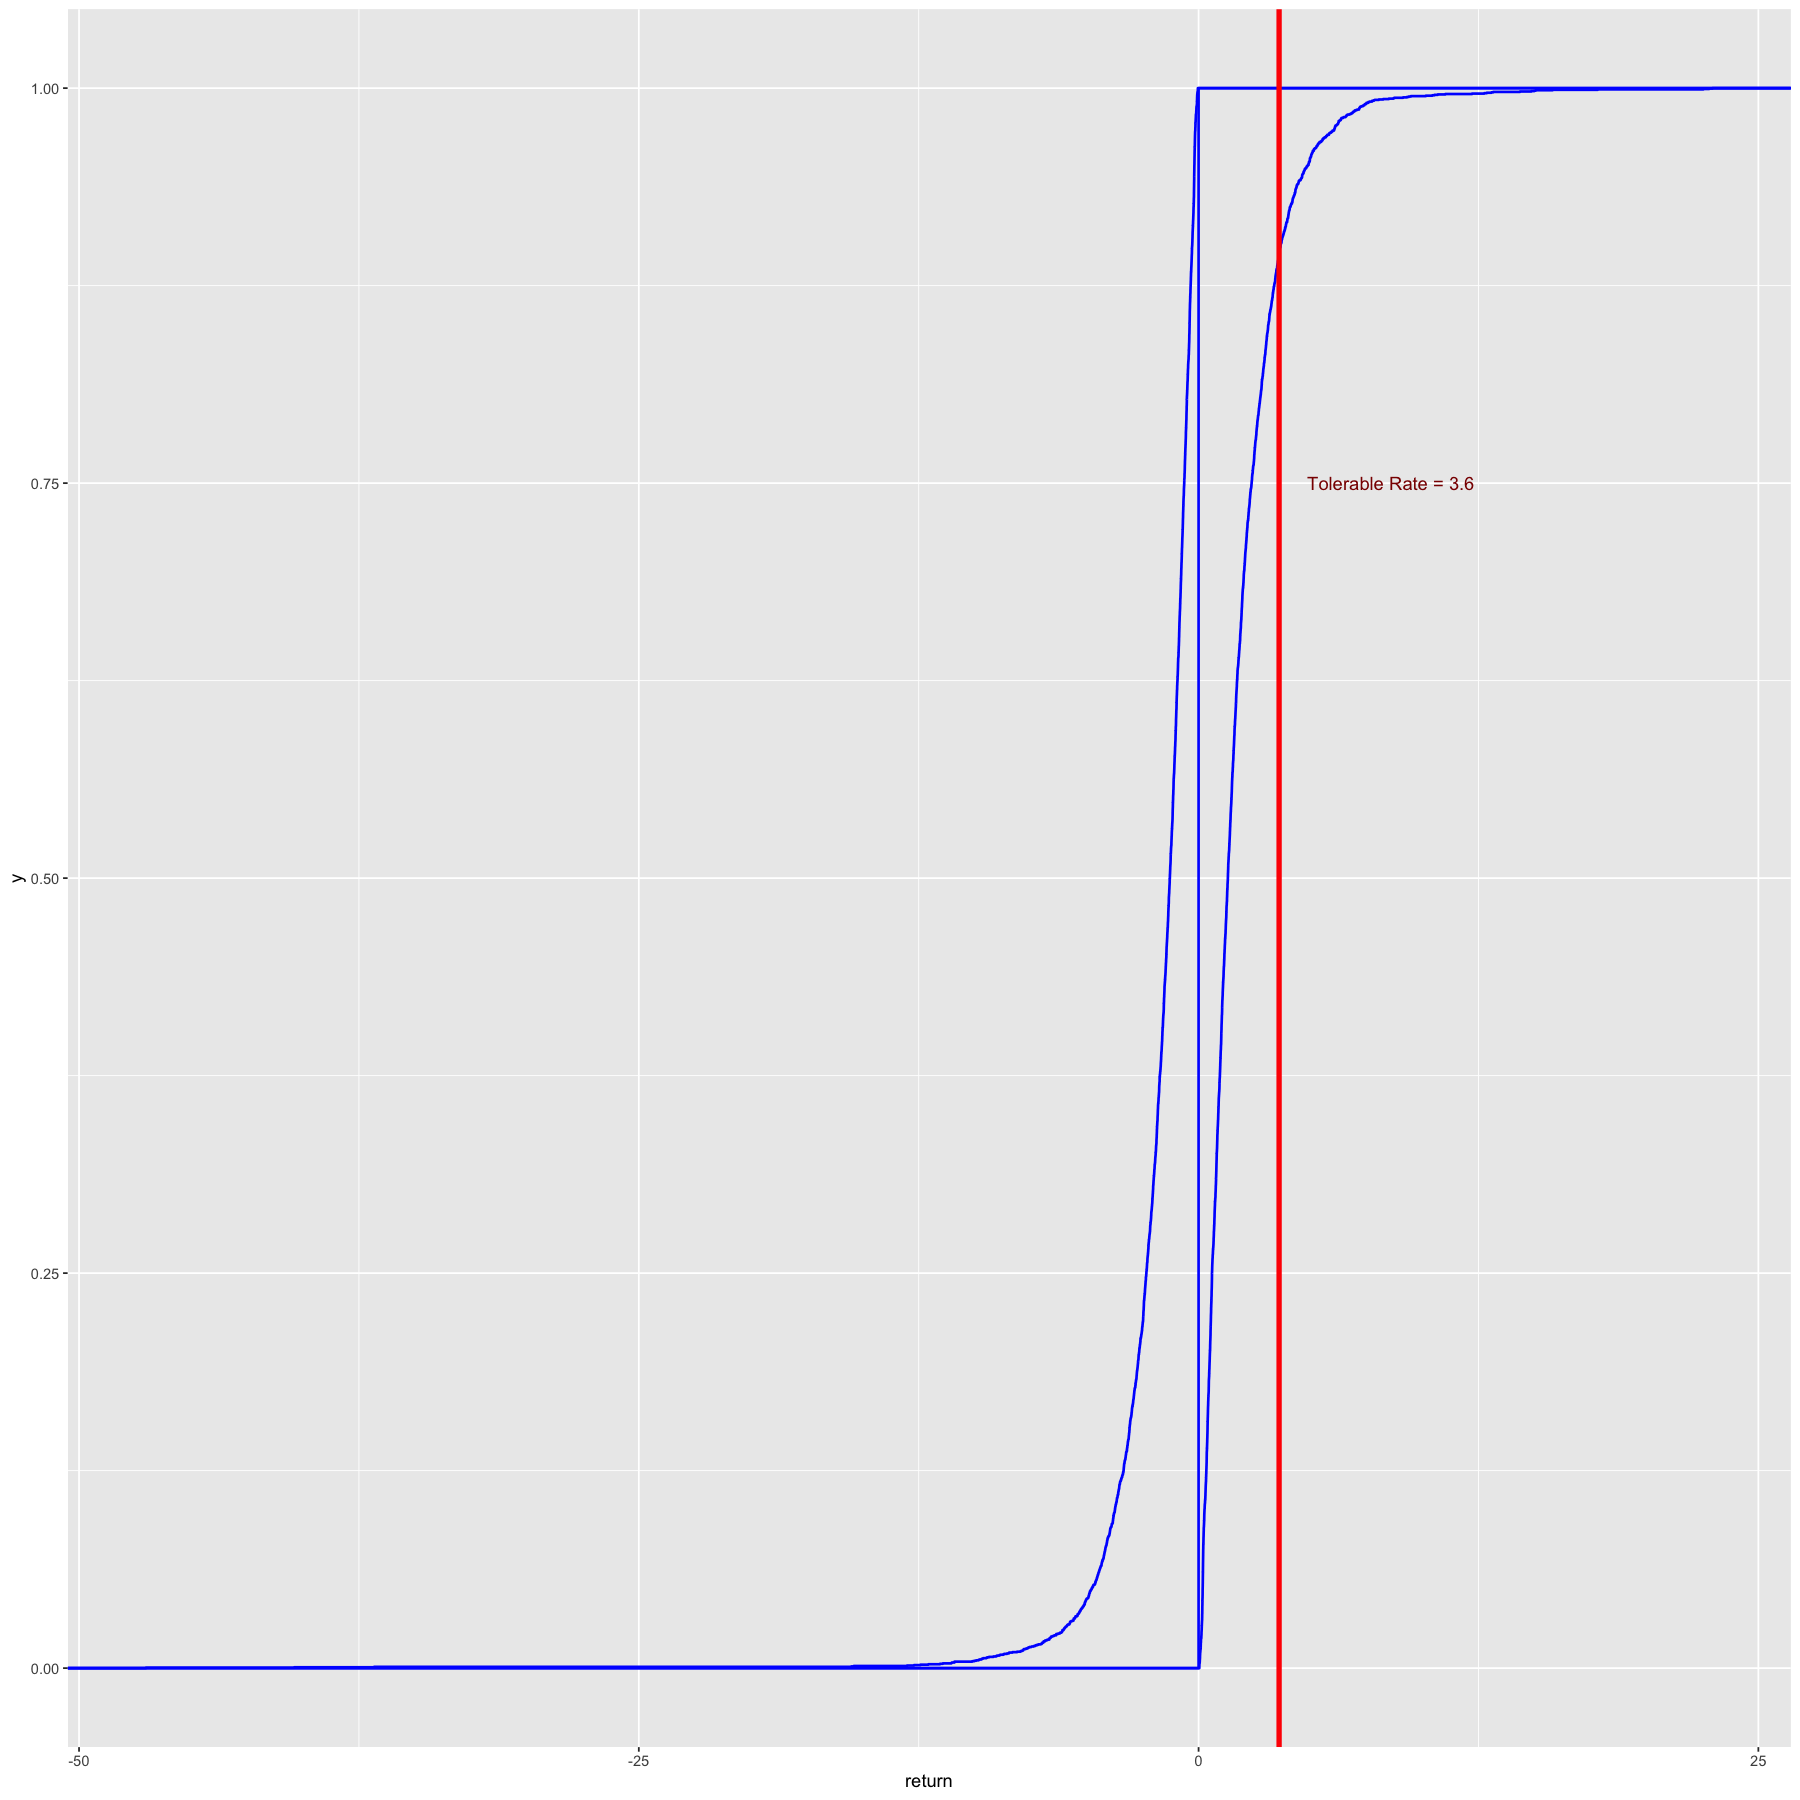

In [65]:
options(repr.plot.width=15, repr.plot.height=15)
HO2.tol.pct <- 0.95
HO2.tol <- quantile(HO2.df$return, HO2.tol.pct)
HO2.tol.label <- paste("Tolerable Rate = ", round(HO2.tol, 2), sep = "")
ggplot(HO2.df, aes(return, fill = direction)) + stat_ecdf(colour = "blue", size = 0.75) + geom_vline(xintercept = HO2.tol, colour = "red", size = 1.5) + annotate("text", x = HO2.tol+5 , y = 0.75, label = HO2.tol.label, colour = "darkred")

# _Comments: The graph shows that the tolerable risk rate of HO2 is 3.6_

### Question2  
How can we regularly, and reliably, analyze HO2 price movements? 

For this requirement, let’s write a function similar to data_moments. Name this new function HO2_movement().

In [66]:
## HO2_movement(file, caption)
## input: HO2 csv file from /data directory
## output: result for input to kable in $table and xtable in $xtable; 
##         data frame for plotting and further analysis in $df.
## Example: HO2.data <- HO2_movement(file = "data/nyhh02.csv", caption = "HO2 NYH")
HO2_movement <- function(file = "nyhh02.csv", caption = "Heating Oil No. 2: 1986-2016"){
  # Read file and deposit into variable
  HO2 <- read.csv(file, header = T, stringsAsFactors = F)
  # stringsAsFactors sets dates as character type
  HO2 <- na.omit(HO2) ## to clean up any missing data
  # Construct expanded data frame
  return <- as.numeric(diff(log(HO2$DHOILNYH))) * 100
  size <- as.numeric(abs(return)) # size is indicator of volatility
  direction <- ifelse(return > 0, "up", ifelse(return < 0, "down", "same")) # another indicator of volatility
  date <- as.Date(HO2$DATE[-1], "%m/%d/%Y") # length of DATE is length of return +1: omit 1st observation
  price <- as.numeric(HO2$DHOILNYH[-1]) # length of DHOILNYH is length of return +1: omit first observation
  HO2.df <- na.omit(data.frame(date = date, price = price, return = return, size = size, direction = direction)) # clean up data frame by omitting NAs
  require(dplyr)
  ## 1: filter if necessary
  # pivot.table <-  filter(HO2.df, size > 0.5*max(size))
  ## 2: set up data frame for by-group processing
  pivot.table <-  group_by(HO2.df, direction)
  ## 3: calculate the summary metrics
  options(dplyr.width = Inf) ## to display all columns
  HO2.count <- length(HO2.df$return)
  pivot.table <-  summarise(pivot.table, return.avg = mean(return), return.sd = sd(return), quantile.5 = quantile(return, 0.05), quantile.95 = quantile(return, 0.95), percent = (length(return)/HO2.count)*100)
  # Construct transpose of pivot table with xtable()
  require(xtable)
  pivot.xtable <- xtable(t(pivot.table), digits = 2, caption = caption, align=rep("r", 4), table.placement="V")
  HO2.caption <- "Heating Oil No. 2: 1986-2016"
  output.list <- list(table = pivot.table, xtable = pivot.xtable, df = HO2.df)
return(output.list)
}

### Test HO2_movement() with data and display results in a table with 2 decimal places.

In [67]:
knitr::kable(HO2_movement(file = "nyhh02.csv")$table, digits = 2)



|direction | return.avg| return.sd| quantile.5| quantile.95| percent|
|:---------|----------:|---------:|----------:|-----------:|-------:|
|down      |      -1.77|      1.99|      -4.78|       -0.19|   47.52|
|same      |       0.00|      0.00|       0.00|        0.00|    3.63|
|up        |       1.76|      1.75|       0.18|        4.82|   48.86|

### Question3
Suppose we wanted to **simulate future movements in HO2 returns.**

**What distribution might we use to run those scenarios?**

Here, let’s use the MASS package’s fitdistr() function to find the optimal fit of the HO2 data to a parametric distribution. 

We will use the gamma distribution to simulate future heating oil #2 price scenarios.

In [70]:
library(MASS)

In [71]:
HO2.data <- HO2_movement(file = "nyhh02.csv", caption = "HO2 NYH")$df
str(HO2.data)
fit.gamma.up <- fitdistr(HO2.data[HO2.data$direction == "up", "return"], "gamma", hessian = TRUE)
fit.gamma.up
# fit.t.same <- fitdistr(HO2.data[HO2.data$direction == "same", "return"], "gamma", hessian = TRUE) # a problem here is all observations = 0
fit.t.down <- fitdistr(HO2.data[HO2.data$direction == "down", "return"], "t", hessian = TRUE)
fit.t.down
fit.gamma.down <- fitdistr(-HO2.data[HO2.data$direction == "down", "return"], "gamma", hessian = TRUE) # gamma distribution defined for data >= 0
fit.gamma.down

'data.frame':	7696 obs. of  5 variables:
 $ date     : Date, format: "1986-06-03" "1986-06-04" ...
 $ price    : num  0.393 0.378 0.39 0.385 0.373 0.365 0.389 0.394 0.398 0.379 ...
 $ return   : num  -2.26 -3.89 3.13 -1.29 -3.17 ...
 $ size     : num  2.26 3.89 3.13 1.29 3.17 ...
 $ direction: Factor w/ 3 levels "down","same",..: 1 1 3 1 1 1 3 3 3 1 ...


Warning message in densfun(x, parm[1], parm[2], ...):
“NaNs produced”


     shape         rate   
  1.30753665   0.74299635 
 (0.02716171) (0.01872184)

Warning message in dt((x - m)/s, df, log = TRUE):
“NaNs produced”
Warning message in dt((x - m)/s, df, log = TRUE):
“NaNs produced”
Warning message in dt((x - m)/s, df, log = TRUE):
“NaNs produced”
Warning message in log(s):
“NaNs produced”
Warning message in log(s):
“NaNs produced”
Warning message in dt((x - m)/s, df, log = TRUE):
“NaNs produced”
Warning message in dt((x - m)/s, df, log = TRUE):
“NaNs produced”
Warning message in dt((x - m)/s, df, log = TRUE):
“NaNs produced”
Warning message in dt((x - m)/s, df, log = TRUE):
“NaNs produced”
Warning message in dt((x - m)/s, df, log = TRUE):
“NaNs produced”
Warning message in log(s):
“NaNs produced”
Warning message in log(s):
“NaNs produced”
Warning message in log(s):
“NaNs produced”
Warning message in dt((x - m)/s, df, log = TRUE):
“NaNs produced”
Warning message in log(s):
“NaNs produced”


        m             s            df     
  -1.30565487    0.91307703    2.50894659 
 ( 0.02170850) ( 0.02061868) ( 0.12442996)

     shape         rate   
  1.31056202   0.73969342 
 (0.02761041) (0.01889467)

### Further questions as needed
(INSERT explanatory text here)

(INSERT r chunks here)